### 3.1. Мінімальний трикутник
В заданому довільному полігоні A0A1...An-1 знайти такі три вершини Ak, Ap та  Aq, щоб площа трикутника AkApAq була найменшою з можливих, а сам трикутник повністю знаходився всередині полігону.

<b>Технічні вимоги.</b>

Координати точок A0, A1, ..., An-1 - цілі числа.

**Вхід.** Текстовий файл, у першому рядку n - кількість вершин полігону 

у наступних n рядках  - у кожному через пропуски координати вершин Ai (Aix ; Aiy), i=0, 1, ..., n-1.

**Вихід.** Три номери вершин (нумерація вершин полігону - з нуля) і площа трикутника.
![Мінімальний трикутник](img/triangle.png)

In [1]:
from shapely.geometry import Polygon, Point

#### Read file

In [2]:
f = open("data/Test31_1.txt", "r", encoding="utf-8-sig")
n, *vertexes = list(filter(None, map(lambda x: list(map(lambda y: int(y), x.split())), f.read().splitlines())))
n = n[0]
if (n != len(vertexes)):
    raise Exception("The number of vertexes is not {}".format(n))
n, vertexes

(14,
 [[-2, 6],
  [0, 4],
  [-2, 4],
  [2, 0],
  [2, 4],
  [6, 4],
  [2, 6],
  [2, 10],
  [-12, 10],
  [-10, 8],
  [-8, 8],
  [-10, 6],
  [-12, 8],
  [-12, 4]])

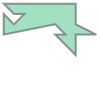

In [3]:
figure = Polygon(vertexes)
figure

In [5]:
min_area = 999999
min_coordinates = []
for i in range(n):
    for j in range(n):
        if i == j:
            continue
        for k in range(n):
            if i == k or j == k:
                continue
            triangle = Polygon([vertexes[i], vertexes[j], vertexes[k]])
            area = triangle.area
            if (area < min_area and area > 0 and figure.contains(triangle)):
                min_area = area
                min_coordinates = [i, j, k]
min_vertexes = list(map(lambda x: vertexes[x], min_coordinates))
min_area, min_coordinates, min_vertexes

(2.0, [0, 1, 4], [[-2, 6], [0, 4], [2, 4]])

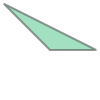

In [6]:
Polygon(min_vertexes)